# AOS_perturbations_inspect

Look at postISR donut images at 0th and 4th perturbation for three levels of perturbations. 


The images were made at NCSA with 



    source "/software/lsstsw/stack/loadLSST.bash"
    source "/project/scichris/aos/setup_aos_current.sh"

    cd /project/scichris/aos/ts_phosim/


    ### screen "closeLoop" on lsst-devl03 

    ctrl+a ,  d  : to detach 

    # by default,  --m1m3FErr 0.05 
    python bin.src/imgCloseLoop.py --inst comcam --numOfProc 25 --boresightDeg 0.03 -0.02 --skyFile tests/testData/sky/skyComCam.txt --output /project/scichris/aos/perturbations/imgCloseLoop_0-05/


    # set --m1m3FErr 0.00
    python bin.src/imgCloseLoop.py --inst comcam --numOfProc 25 --boresightDeg 0.03 -0.02 --skyFile tests/testData/sky/skyComCam.txt --output /project/scichris/aos/perturbations/imgCloseLoop_0-00/ --m1m3FErr 0.0


    ### screen "pert" on lsst-devl02 

    # set --m1m3FErr 0.2 
    python bin.src/imgCloseLoop.py --inst comcam --numOfProc 25 --boresightDeg 0.03 -0.02 --skyFile tests/testData/sky/skyComCam.txt --output /project/scichris/aos/perturbations/imgCloseLoop_0-20/ --m1m3FErr 0.2 


I copied the images to `/home/scichris/WORK/aos/perturbations` , and indeed the perturbations there for `m1m3FErr = 0.2` are indeed larger than for `m1m3FErr = 0.0` 

Show the postISR donut images: 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.table import Table
from astropy.coordinates import SkyCoord
import lsst.daf.persistence as dafPersist

00
/project/scichris/aos/perturbations/imgCloseLoop_0-00/
20
/project/scichris/aos/perturbations/imgCloseLoop_0-20/


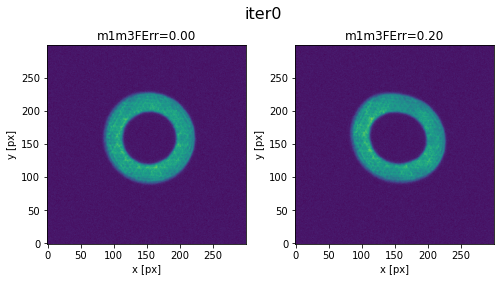

In [90]:

def plot_pert_iter(iterNum=0):
    fig,ax = plt.subplots(1,2, figsize=(8,4))
    xmin,xmax = 2250,2550
    ymin,ymax = 1300,1600

    images = {}

    for pert in ['00','20']:
        print(pert)
        data_dir = f'/project/scichris/aos/perturbations/imgCloseLoop_0-{pert}/'
        print(data_dir)
        rerun='run1'
        repo_dir = os.path.join(data_dir, 'input/rerun/', rerun)
        butler = dafPersist.Butler(repo_dir)
        visit = f'40211231060{iterNum}2'
        data_id = {'visit': int(visit), 'filter': 'g', 'raftName': 'R22', 
                           'detectorName': 'S22', 'detector': 98
                   }

        post = butler.get('postISRCCD', **data_id) 
        images[pert] = post.image.array

    i=0
    for pert in ['00','20']:
        ax[i].imshow(images[pert][ymin:ymax,xmin:xmax], origin='lower',  vmax=500)
        ax[i].set_title(f'm1m3FErr=0.{pert}')
        ax[i].set_xlabel('x [px]')
        ax[i].set_ylabel('y [px]')
        i += 1 
    fig.subplots_adjust(wspace=0.25)
    fig.suptitle(f'iter{iterNum}', fontsize=16)
    
plot_pert_iter(0)

At 0th iteration the large perturbations (on the right are clearly stronger than no perturbations (on the left)). 

00
/project/scichris/aos/perturbations/imgCloseLoop_0-00/
20
/project/scichris/aos/perturbations/imgCloseLoop_0-20/


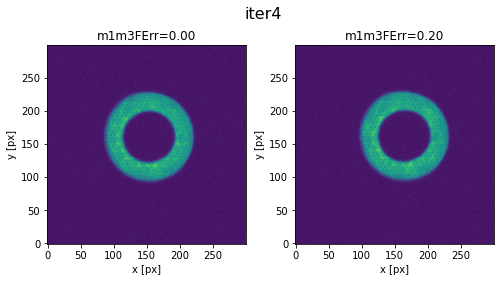

In [91]:
plot_pert_iter(4)

At 4th iteration the image has converged both for small and for large initial perturbation. 